In [1]:
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib notebook  
%matplotlib inline 
import astropy
from astropy import units as u
import astropy.table as Table
from astropy.table import QTable
from astropy.io import ascii
from astropy.io import fits
import scipy.interpolate as interp
from synphot import units
from synphot import SourceSpectrum,SpectralElement,Observation,ExtinctionModel1D,Empirical1D
from dust_extinction.dust_extinction import F99

Equivalent width, $EW$, is defined as the width of a rectangle with height of the continuum, $F$, that contains the integrated line flux, $I$.  



If flux is added along the sightline, the additive component raises both the continuum and the line depth by the same amount, so the integrated line flux is unchanged.  However, the integrated line flux requires a smaller width to represent the same integrated flux for the now-higher continuum, so the equivalent width is smaller.

Veiling, for example, is "an excess of near-infrared emission with presumably arises from the inner edge of a cool circumstellar disk." (Faesi et al. 2012).  If a stellar flux $F_*$ is veiled by an excess $E$, 
$$
EW_{\rm unveiled} = \frac{I}{F_*}
{\rm \ \ \ and \ \ \ }
EW_{\rm veiled} = \frac{I}{F_*+E}
$$

If we define a veiling parameter as 
$$
r_{\lambda} = \frac{E}{F_*}
$$
then with measured equivalent widths,
$$
\frac{EW_{\rm unveiled}}{EW_{\rm veiled}} = \frac{F_*+E}{F_*} = 1 + r_{\lambda}.
$$



If, on ther other hand, there is a multiplicative reduction in stellar flux due to extinction, the situation is reverse. Flux in the line depth is reduced less than the continuum, and the integrated line intensity is therefore smaller.  The equivalent width, however, remains unchanged.  The ratio of the integrated line itensities before and after extinction is dependent only on the amount of extinction.  If we define an extinction parameter $A$ as
$$
10^{-0.4 A_{\lambda}} = \frac{F_{\rm dusted}}{F_{\rm undusted}}
$$
then with integrated line intensities,
$$
\frac{I_{\rm undusted}}{I_{\rm dusted}} = 10^{+0.4 A_{\lambda}}
$$



Now let's combine both excess, $E$ and extinction, $A$ in the foreground of the star, $F_*$.  What we observe, $O$, is
$$
O = (F_* + E)10^{-0.4 A_{\lambda}}.
$$
Taking the ratio of two observations, with two different excesses and two different extinctions,
$$
\frac{O_{2014}}{O_{2008}} = \frac{F_* + E_{2014}}{F_* + E_{2008}}10^{-0.4 \Delta A_{\lambda}}.
$$

A-ha!  The scaling factor in front of the relative extinction term is just the ratio of the equivalent widths,
$$
\frac{O_{2014}}{O_{2008}} = \frac{EW_{2008}}{EW_{2014}}10^{-0.4 \Delta A_{\lambda}}.
$$
being careful to note the flip in the indices.

In other words, to find the extinction from the observed spectra, we need to add a bit in the infrared due to the excess, and we can measure the excess by the ratio of the equivalent widths,
$$
\Delta A_{\lambda} = 2.5 \log\left(\frac{EW_{2008}}{EW_{2014}}\right) + 2.5 \log\left(\frac{O_{2008}}{O_{2014}}\right)
$$

The format of the files is 
date : name : wavelength : EW  : integrated_flux  :   x_blue_continuum : y_blue_continuum : x_red_continuum : y_red continuum

Different attempts may be significantly different line, possible line combinations.  Dates are 2006, 2008, 2012, 2014.92, and 2014.96.

In [2]:
data1 = ascii.read('AATau_IR2008.txt')
data2 = ascii.read('AATau_opt2008.txt')
data = Table.vstack([data2, data1])
allwav_2008=data['wavelength']
alldata_2008=data['flux']

data1 = ascii.read('AATau_IR2014dec02.txt')
data2 = ascii.read('AATau_opt2014dec02.txt')
data = Table.vstack([data2, data1])
allwav_dec02=data['wavelength']
alldata_dec02=data['flux']

data1 = ascii.read('AATau_IR2014dec12.txt')
data2 = ascii.read('AATau_opt2014dec12.txt')
data = Table.vstack([data2, data1])
allwav_dec12=data['wavelength']
alldata_dec12=data['flux']

In [3]:
interp2008=interp.interp1d(allwav_2008,alldata_2008)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


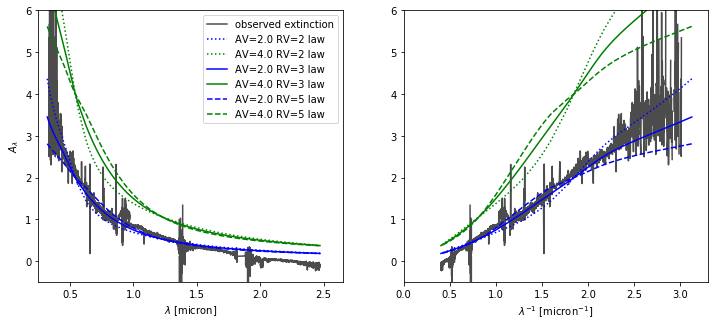

In [4]:
fig,axs=plt.subplots(1,2,figsize=(12,5))

ext_dec02=-2.5*np.log10(alldata_dec02.value/interp2008(allwav_dec02))

axs[0].plot(allwav_dec02,ext_dec02,'k',alpha=0.7,label='observed extinction')
axs[1].plot(1./allwav_dec02,ext_dec02,'k',alpha=0.7)

for R,line,legend in list(zip((2,3,5),('dotted','solid','dashed'),('2','3','5'))):
    ext=F99(Rv=R)
    axs[0].plot(allwav_2008,2.0*ext(allwav_2008),'b',linestyle=line,label='AV=2.0 RV='+legend+' law')
    axs[1].plot(1/allwav_2008,2.0*ext(allwav_2008),'b',linestyle=line)
    axs[0].plot(allwav_2008,4.0*ext(allwav_2008),'g',linestyle=line,label='AV=4.0 RV='+legend+' law')
    axs[1].plot(1/allwav_2008,4.0*ext(allwav_2008),'g',linestyle=line)

axs[0].legend(loc='best')
axs[0].set_ylabel('$A_\lambda$')
axs[0].set_xlabel('$\lambda$ [micron]')
axs[1].set_xlabel('$\lambda^{-1}$ [micron$^{-1}$]')

axs[0].set_ylim(-0.5,6.0)
axs[1].set_ylim(-0.5,6.0)
axs[0].set_xlim(0.25,2.65)
axs[1].set_xlim(0,3.3)

plt.show()

In [5]:
t1=Table.Table.read('EqW_1.txt',format='ascii')
t2=Table.Table.read('EqW_2.txt',format='ascii')
t3=Table.Table.read('EqW_3.txt',format='ascii')

In [6]:
t1

Epoch,LineName,LineLambda,EqW,Flux,blueX,blueY,RedX,RedY
float64,str9,float64,float64,float64,float64,float64,float64,float64
2008.0,Ca-1.03,1.0348,8.317e-05,4.5495e-18,1.0336,5.4944e-14,1.0352,5.4458e-14
2014.92,Ca-1.03,1.0348,7.155e-05,1.8044e-18,1.0338,2.5263e-14,1.0351,2.5175e-14
2014.96,Ca-1.03,1.0348,6.721e-05,1.5121e-18,1.0338,2.2589e-14,1.0351,2.2406e-14
2012.0,Ca-1.03,1.0348,7.0497e-05,1.4029e-17,1.0334,1.9938e-13,1.0349,1.9862e-13
2006.0,Ca-1.03,1.0348,7.3425e-05,5.0339e-18,1.0339,6.8657e-14,1.0355,6.846e-14
2008.0,Si-1.06,1.05888,4.8759e-05,2.6245e-18,1.0582,5.3963e-14,1.0598,5.3689e-14
2014.92,Si-1.06,1.05888,4.6958e-05,1.2007e-18,1.058,2.5507e-14,1.0597,2.5635e-14
2014.96,Si-1.06,1.05888,4.2966e-05,9.6682e-19,1.0583,2.2525e-14,1.0596,2.2479e-14
2012.0,Si-1.06,1.05888,3.7641e-05,7.6887e-18,1.0577,2.0373e-13,1.0596,2.0479e-13


In [7]:
# fig,ax=plt.subplots(5,1,figsize=(5,20))
# i=0
# for date in [2006,2008,2012,2014.92,2014.96]:
#     ax[i].plot(t1['LineLambda'][t1['Epoch']==date],t1['EqW'][t1['Epoch']==date],'rs',fillstyle='none',label='file1')
#     ax[i].plot(t2['LineLambda'][t2['Epoch']==date],t2['EqW'][t2['Epoch']==date],'bo',fillstyle='none',label='file2')
#     ax[i].plot(t3['LineLambda'][t3['Epoch']==date],t3['EqW'][t3['Epoch']==date],'g^',fillstyle='none',label='file3')
#     ax[i].set_title(date)
#     ax[i].set_ylabel('EW')
#     ax[i].set_ylim(0,0.0014)
#     i+=1
# ax[0].legend()
# fig.show()

In [8]:
t1['Run']=1
t2['Run']=2
t3['Run']=3

In [9]:
t=Table.vstack([t1,t2,t3])

In [10]:
t2014a=t[t['Epoch']==2014.92]
t2014b=t[t['Epoch']==2014.96]
t2008=t[t['Epoch']==2008]

In [11]:
r2014a=t2008['EqW']/t2014a['EqW']-1
r2014b=t2008['EqW']/t2014b['EqW']-1

In [12]:
#better:
EWratio_a=t2008['EqW']/t2014a['EqW']
EWratio_b=t2008['EqW']/t2014b['EqW']

In [13]:
Iratio_a=t2008['Flux']/t2014a['Flux']
Iratio_b=t2008['Flux']/t2014b['Flux']

In [14]:
# From Fischer:
# Fisch_lam=np.array([.48,.51,.55,.59,.63,.67,.74,.81,.86,1.08,.82,.91,.97,1.05,1.18,1.31,1.98,2.11,2.2,2.26])
# Fisch_r=np.array([.1,.1,.1,.1,.1,.1,.1,.1,.1,.1,.1,.2,.2,.2,.2,.2,.3,.3,.3,.5])
# z=np.polyfit(Fisch_lam, Fisch_r, 2)
# print,z

In [15]:
# plt.plot(Fisch_lam,Fisch_r,'bo')
# x=np.arange(.7,2.4,.1)
# plt.plot(x, z[0]*x**2+z[1]*x+z[2],'r',label='Fischer power law fit')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


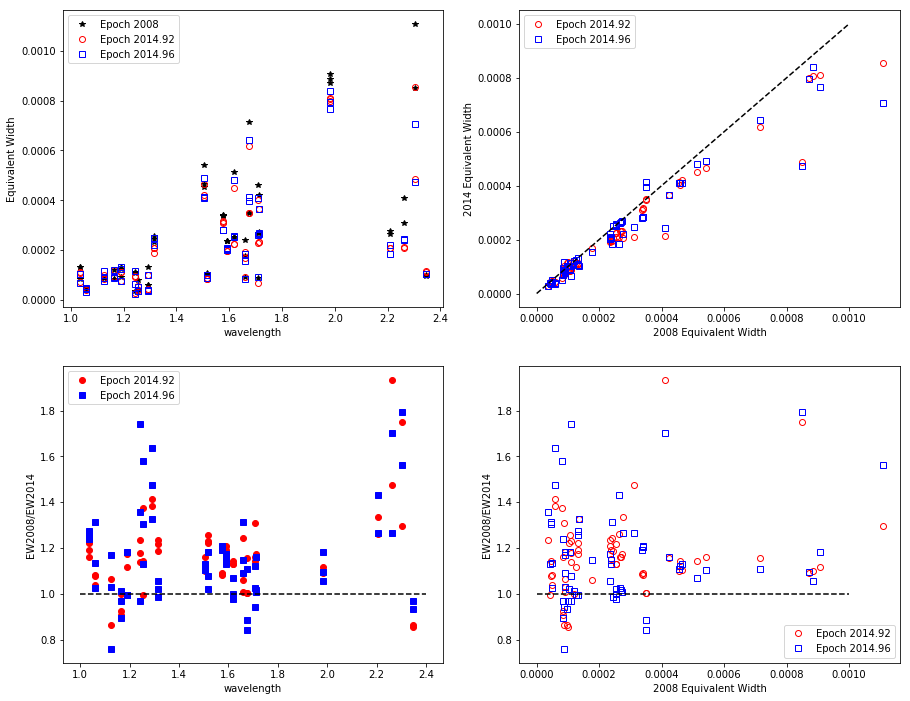

In [16]:
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(15,12))

ax1.plot(t2008['LineLambda'], t2008['EqW'], 'k*', label='Epoch 2008')
ax1.plot(t2008['LineLambda'], t2014a['EqW'], 'ro', fillstyle='none', label='Epoch 2014.92')
ax1.plot(t2008['LineLambda'], t2014b['EqW'], 'bs', fillstyle='none', label='Epoch 2014.96')
ax1.legend()
ax1.set_ylabel('Equivalent Width')
ax1.set_xlabel('wavelength')

ax2.plot(t2008['EqW'], t2014a['EqW'], 'ro', fillstyle='none', label='Epoch 2014.92')
ax2.plot(t2008['EqW'], t2014b['EqW'],  'bs', fillstyle='none', label='Epoch 2014.96')
ax2.legend()
ax2.set_ylabel('2014 Equivalent Width')
ax2.set_xlabel('2008 Equivalent Width')
ax2.plot([0,0.001],[0,0.001],'--k')



ax3.plot(t2008['LineLambda'] ,EWratio_a, 'ro', label='Epoch 2014.92')
ax3.plot(t2008['LineLambda'] ,EWratio_b, 'bs', label='Epoch 2014.96')
ax3.set_xlabel('wavelength')
ax3.set_ylabel('EW2008/EW2014')
ax3.plot([1,2.4],[1,1],'--k')
ax3.legend()


ax4.plot(t2008['EqW'], EWratio_a, 'ro', fillstyle='none', label='Epoch 2014.92')
ax4.plot(t2008['EqW'], EWratio_b, 'bs', fillstyle='none', label='Epoch 2014.96')
ax4.legend(loc="lower right")
ax4.set_ylabel('EW2008/EW2014')
ax4.set_xlabel('2008 Equivalent Width')
ax4.plot([0,0.001],[1,1],'--k')

fig.show()

Try remaking the lower left plot including which file as symbol shape.

In [17]:
#fig,ax3=plt.subplots(1,1)

#ax3.plot(t2008['LineLambda'][t2008['Run']==1] ,r2014a[t2008['Run']==1], 'rs', fillstyle='none',label='2014.92 #1')
#ax3.plot(t2008['LineLambda'][t2008['Run']==2] ,r2014a[t2008['Run']==2], 'ro', fillstyle='none',label='2014.92 #2')
#ax3.plot(t2008['LineLambda'][t2008['Run']==3] ,r2014a[t2008['Run']==3], 'r^', fillstyle='none',label='2014.92 #3')

#ax3.plot(t2008['LineLambda'][t2008['Run']==1] ,r2014b[t2008['Run']==1], 'bs', fillstyle='none',label='2014.96 #1')
#ax3.plot(t2008['LineLambda'][t2008['Run']==2] ,r2014b[t2008['Run']==2], 'bo', fillstyle='none',label='2014.96 #2')
#ax3.plot(t2008['LineLambda'][t2008['Run']==3] ,r2014b[t2008['Run']==3], 'b^', fillstyle='none',label='2014.96 #3')
#ax3.set_xlabel('wavelength')
#ax3.set_ylabel('$r_\lambda$ relative to 2008')
#ax3.plot([1,2.4],[0,0],'--k')
#ax3.legend()

#plt.show()   

Some lines are clearly better than others.  Let's get a list of unique line names, then make a separate plot by line.

In [18]:
uniquelines=Table.unique(t2008,keys="LineName")['LineName','LineLambda']
uniquelines.sort('LineLambda')
uniquelines

LineName,LineLambda
str9,float64
Ca-1.03,1.0348
Si-1.06,1.05888
Al-1.12,1.1258
Fe-1.17,1.1645
Fe-1.19,1.1887
K-1.24,1.24368
K-1.25,1.2526
Mn-1.29,1.29045
Al-1.31,1.3141


In [19]:
# and sort by wavelength
lines=uniquelines['LineName']
lines

Ca-1.03
Si-1.06
Al-1.12
Fe-1.17
Fe-1.19
K-1.24
K-1.25
Mn-1.29
Al-1.31
Mg-1.50
KI-1.51


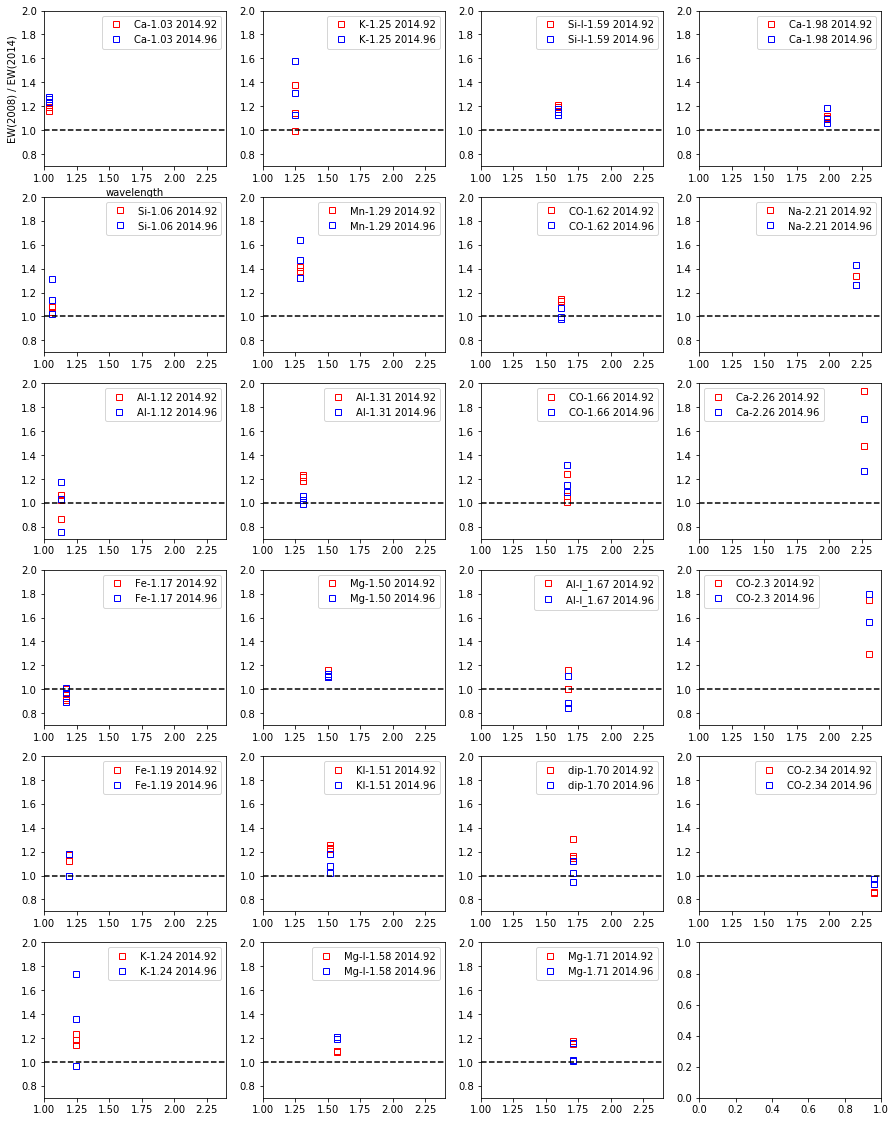

In [20]:
fig,axs=plt.subplots(6,4,figsize=(15,20))

for j in range(4):

    for i in range(6):

        if (i+j*6<23):
            
            axs[i,j].plot(t2008['LineLambda'][t2008['LineName']==lines[i+j*6]],EWratio_a[t2008['LineName']==lines[i+j*6]],
                          'rs',fillstyle='none',label=lines[i+j*6]+' 2014.92')
            axs[i,j].plot(t2008['LineLambda'][t2008['LineName']==lines[i+j*6]],EWratio_b[t2008['LineName']==lines[i+j*6]],
                          'bs',fillstyle='none',label=lines[i+j*6]+' 2014.96')
            axs[i,j].set_xlim(1,2.4)
            axs[i,j].set_ylim(0.7,2.0)
            axs[i,j].plot([1,2.4],[1,1],'--k')
            axs[i,j].legend()

axs[0,0].set_ylabel('EW(2008) / EW(2014)')
axs[0,0].set_xlabel('wavelength')

plt.show()

In [21]:
za=np.polyfit(np.log10(t2014a['LineLambda']) , np.log10(EWratio_a), 1)
zb=np.polyfit(np.log10(t2014b['LineLambda']) , np.log10(EWratio_b), 1)

[]

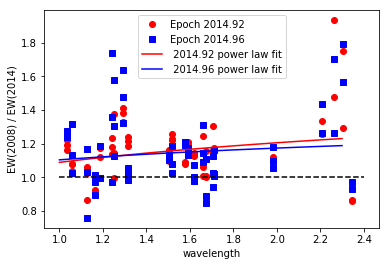

In [22]:
plt.plot(t2014a['LineLambda'], EWratio_a, 'ro', label='Epoch 2014.92')
plt.plot(t2014b['LineLambda'], EWratio_b, 'bs', label='Epoch 2014.96')

x=np.arange(1,2.4,.1)
plt.plot(x, 10**(za[1]) * x**(za[0]),'r',label=' 2014.92 power law fit')
plt.plot(x, 10**(zb[1]) * x**(zb[0]),'b',label=' 2014.96 power law fit')

plt.xlabel('wavelength')
plt.ylabel('EW(2008) / EW(2014)')
plt.plot([1,2.4],[1,1],'--k')
plt.legend()
plt.plot()

Better: take the log, since that is what we are going to do anyway!

[]

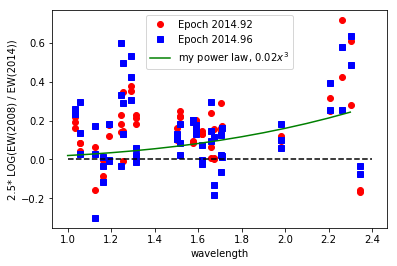

In [23]:
plt.plot(t2014a['LineLambda'], 2.5*np.log10(EWratio_a), 'ro', label='Epoch 2014.92')
plt.plot(t2014b['LineLambda'], 2.5*np.log10(EWratio_b), 'bs', label='Epoch 2014.96')

x=np.arange(1,2.4,.1)
plt.plot(x,0.02*x**3,'-g',label='my power law, $0.02 x^3$')

plt.xlabel('wavelength')
plt.ylabel('2.5* LOG(EW(2008) / EW(2014))')
plt.plot([1,2.4],[0,0],'--k')
plt.legend()
plt.plot()

And try averaging over each line:

[]

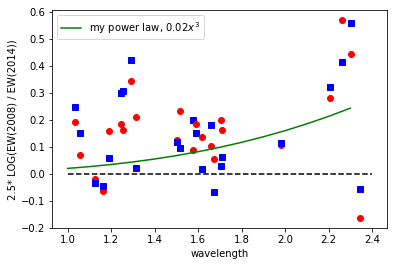

In [34]:
for line in lines:
    plt.plot(np.mean(t2014a['LineLambda'][t2014a['LineName']==line]), np.mean(2.5*np.log10(EWratio_a)[t2014a['LineName']==line]), 'ro')
    plt.plot(np.mean(t2014b['LineLambda'][t2014a['LineName']==line]), np.mean(2.5*np.log10(EWratio_b)[t2014a['LineName']==line]), 'bs')

x=np.arange(1,2.4,.1)
plt.plot(x,0.02*x**3,'-g',label='my power law, $0.02 x^3$')

plt.xlabel('wavelength')
plt.ylabel('2.5* LOG(EW(2008) / EW(2014))')
plt.plot([1,2.4],[0,0],'--k')
plt.legend()
plt.plot()

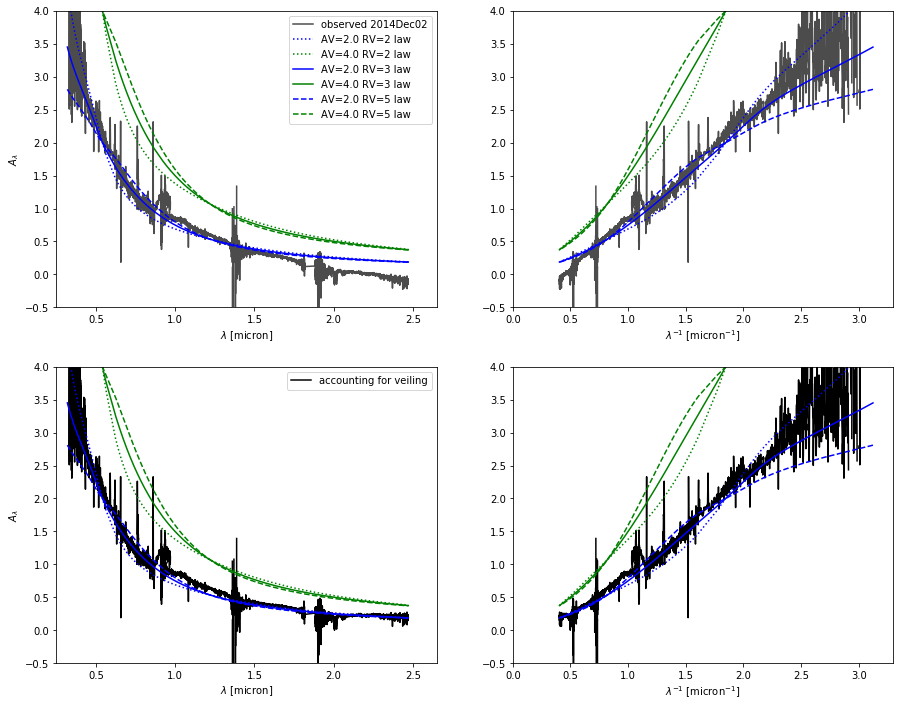

In [24]:
fig,axs=plt.subplots(2,2,figsize=(15,12))


axs[0,0].plot(allwav_dec02,ext_dec02,'k',alpha=0.7,label='observed 2014Dec02')
axs[0,1].plot(1./allwav_dec02,ext_dec02,'k',alpha=0.7)

for R,line,legend in list(zip((2,3,5),('dotted','solid','dashed'),('2','3','5'))):
    ext=F99(Rv=R)
    axs[0,0].plot(allwav_2008,2.0*ext(allwav_2008),'b',linestyle=line,label='AV=2.0 RV='+legend+' law')
    axs[0,1].plot(1/allwav_2008,2.0*ext(allwav_2008),'b',linestyle=line)
    axs[0,0].plot(allwav_2008,4.0*ext(allwav_2008),'g',linestyle=line,label='AV=4.0 RV='+legend+' law')
    axs[0,1].plot(1/allwav_2008,4.0*ext(allwav_2008),'g',linestyle=line)

axs[0,0].legend(loc='best')
axs[0,0].set_ylabel('$A_\lambda$')
axs[0,0].set_xlabel('$\lambda$ [micron]')
axs[0,1].set_xlabel('$\lambda^{-1}$ [micron$^{-1}$]')

axs[0,0].set_ylim(-0.5,4.0)
axs[0,1].set_ylim(-0.5,4.0)
axs[0,0].set_xlim(0.25,2.65)
axs[0,1].set_xlim(0,3.3)


# now with veiling

axs[1,0].plot(allwav_dec02,ext_dec02+0.02*allwav_dec02.value**3,'k',label='accounting for veiling')
axs[1,1].plot(1./allwav_dec02,ext_dec02+0.02*allwav_dec02.value**3,'k')

for R,line,legend in list(zip((2,3,5),('dotted','solid','dashed'),('2','3','5'))):
    ext=F99(Rv=R)
    axs[1,0].plot(allwav_2008,2.0*ext(allwav_2008),'b',linestyle=line)
    axs[1,1].plot(1/allwav_2008,2.0*ext(allwav_2008),'b',linestyle=line)
    axs[1,0].plot(allwav_2008,4.0*ext(allwav_2008),'g',linestyle=line)
    axs[1,1].plot(1/allwav_2008,4.0*ext(allwav_2008),'g',linestyle=line)



axs[1,0].legend(loc='best')
axs[1,0].set_ylabel('$A_\lambda$')
axs[1,0].set_xlabel('$\lambda$ [micron]')
axs[1,1].set_xlabel('$\lambda^{-1}$ [micron$^{-1}$]')

axs[1,0].set_ylim(-0.5,4.0)
axs[1,1].set_ylim(-0.5,4.0)
axs[1,0].set_xlim(0.25,2.65)
axs[1,1].set_xlim(0,3.3)


plt.show()

Woot!

Now we can check our analysis.  The ratio of the line intensities is just the extinction, as shown above:
$$
\frac{I_{\rm undusted}}{I_{\rm dusted}} = 10^{+0.4 A_{\lambda}}
$$


No handles with labels found to put in legend.


[]

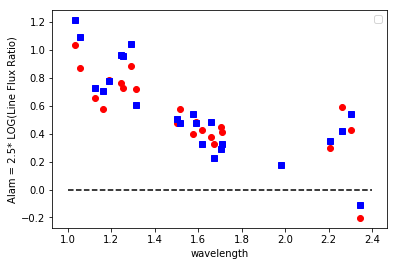

In [35]:
for line in lines:
    plt.plot(np.mean(t2014a['LineLambda'][t2014a['LineName']==line]), np.mean(2.5*np.log10(Iratio_a)[t2014a['LineName']==line]), 'ro')
    plt.plot(np.mean(t2014b['LineLambda'][t2014a['LineName']==line]), np.mean(2.5*np.log10(Iratio_b)[t2014a['LineName']==line]), 'bs')

x=np.arange(1,2.4,.1)
# plt.plot(x,0.02*x**3,'-g',label='my power law, $0.02 x^3$')

plt.xlabel('wavelength')
plt.ylabel('Alam = 2.5* LOG(Line Flux Ratio)')
plt.plot([1,2.4],[0,0],'--k')
plt.legend()
plt.plot()

No handles with labels found to put in legend.


[]

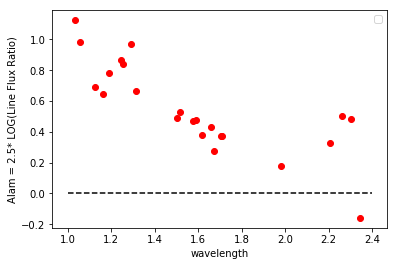

In [37]:
for line in lines:
    xx=np.mean(t2014a['LineLambda'][t2014a['LineName']==line])
    yy=0.5*(np.mean(2.5*np.log10(Iratio_a)[t2014a['LineName']==line])+np.mean(2.5*np.log10(Iratio_b)[t2014a['LineName']==line]))
    plt.plot(xx,yy, 'ro')
    
x=np.arange(1,2.4,.1)
# plt.plot(x,0.02*x**3,'-g',label='my power law, $0.02 x^3$')

plt.xlabel('wavelength')
plt.ylabel('Alam = 2.5* LOG(Line Flux Ratio)')
plt.plot([1,2.4],[0,0],'--k')
plt.legend()
plt.plot()

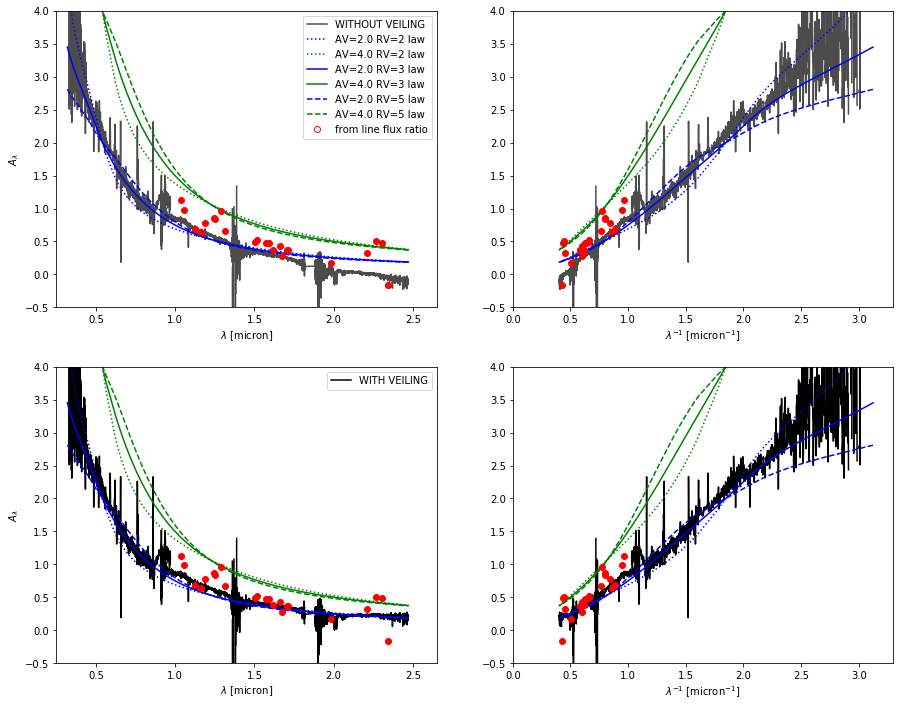

In [40]:
fig,axs=plt.subplots(2,2,figsize=(15,12))


axs[0,0].plot(allwav_dec02,ext_dec02,'k',alpha=0.7,label='WITHOUT VEILING')
axs[0,1].plot(1./allwav_dec02,ext_dec02,'k',alpha=0.7)

for R,line,legend in list(zip((2,3,5),('dotted','solid','dashed'),('2','3','5'))):
    ext=F99(Rv=R)
    axs[0,0].plot(allwav_2008,2.0*ext(allwav_2008),'b',linestyle=line,label='AV=2.0 RV='+legend+' law')
    axs[0,1].plot(1/allwav_2008,2.0*ext(allwav_2008),'b',linestyle=line)
    axs[0,0].plot(allwav_2008,4.0*ext(allwav_2008),'g',linestyle=line,label='AV=4.0 RV='+legend+' law')
    axs[0,1].plot(1/allwav_2008,4.0*ext(allwav_2008),'g',linestyle=line)



# now with veiling

axs[1,0].plot(allwav_dec02,ext_dec02+0.02*allwav_dec02.value**3,'k',label='WITH VEILING')
axs[1,1].plot(1./allwav_dec02,ext_dec02+0.02*allwav_dec02.value**3,'k')

for R,line,legend in list(zip((2,3,5),('dotted','solid','dashed'),('2','3','5'))):
    ext=F99(Rv=R)
    axs[1,0].plot(allwav_2008,2.0*ext(allwav_2008),'b',linestyle=line)
    axs[1,1].plot(1/allwav_2008,2.0*ext(allwav_2008),'b',linestyle=line)
    axs[1,0].plot(allwav_2008,4.0*ext(allwav_2008),'g',linestyle=line)
    axs[1,1].plot(1/allwav_2008,4.0*ext(allwav_2008),'g',linestyle=line)

for line in lines:
    xx=np.mean(t2014a['LineLambda'][t2014a['LineName']==line])
    yy=0.5*(np.mean(2.5*np.log10(Iratio_a)[t2014a['LineName']==line])+np.mean(2.5*np.log10(Iratio_b)[t2014a['LineName']==line]))
    axs[0,0].plot(xx,yy, 'ro')
    axs[1,0].plot(xx,yy, 'ro')
    axs[0,1].plot(1/xx,yy, 'ro')
    axs[1,1].plot(1/xx,yy, 'ro')
axs[0,0].plot(xx,yy, 'ro', label='from line flux ratio',fillstyle='none')


axs[0,0].legend(loc='best')
axs[0,0].set_ylabel('$A_\lambda$')
axs[0,0].set_xlabel('$\lambda$ [micron]')
axs[0,1].set_xlabel('$\lambda^{-1}$ [micron$^{-1}$]')

axs[0,0].set_ylim(-0.5,4.0)
axs[0,1].set_ylim(-0.5,4.0)
axs[0,0].set_xlim(0.25,2.65)
axs[0,1].set_xlim(0,3.3)





axs[1,0].legend(loc='best')
axs[1,0].set_ylabel('$A_\lambda$')
axs[1,0].set_xlabel('$\lambda$ [micron]')
axs[1,1].set_xlabel('$\lambda^{-1}$ [micron$^{-1}$]')

axs[1,0].set_ylim(-0.5,4.0)
axs[1,1].set_ylim(-0.5,4.0)
axs[1,0].set_xlim(0.25,2.65)
axs[1,1].set_xlim(0,3.3)


plt.show()